# Bellman-Ford algorithm

## Vertice Class
- A Vertice is a node in a graph

In [1]:
index_node_dict = {
    0: 's',
    1: 't',
    2: 'x',
    3: 'z',
    4: 'y'
}

class Vertice(object):
    def __init__(self, node):
        self.id = node
        self.adjacents = {}
        self.d = float('Inf')
        self.p = None
        
    def __str__(self):
        return str(index_node_dict[self.id]) + ' -> ' + str(self.adjacents)

## Graph Class
- A Graph is a set of vertice objects

In [2]:
class Graph(object):
    def __init__(self):
        self.vertices = []
        self.grid_data = []
        self.grid_dimension = 0

    # reads file data to grid
    def read_grid(self, filename):
        with open(filename) as file:
            next(file)
            self.grid_data = [[int(item) for item in line.split()] for line in file.readlines()]
        self.grid_dimension = len(self.grid_data)

    # builds Graph, setting adjacence lists and weigths for each edge
    def build_graph(self):
        for index in range(0, self.grid_dimension):
            vertice = Vertice(index)
            self.vertices.append(vertice)
            
        for y, line in enumerate(self.grid_data):
            for x, value in enumerate(line):
                weight = value
                if weight != 0:
                    self.vertices[x].adjacents[y] = weight
        self.vertices[0].d = 0
   
    # Prints graph as a list of vertices and its adjacence lists
    def print_adj_list(self):
        for vertice in self.vertices:
            print(vertice)


## Import input grid
Imports from raw .in file organized:

first line -> square matrix dimension value

other lines -> matrix with weight value lines separated by space

In [3]:
my_graph = Graph()
my_graph.read_grid('./input/g2.in')
my_graph.grid_data

[[0, 0, 0, 2, 0],
 [6, 0, -2, 0, 0],
 [0, 5, 0, 7, -3],
 [0, -4, 0, 0, 0],
 [7, 8, 0, 0, 9]]

## Graph representation

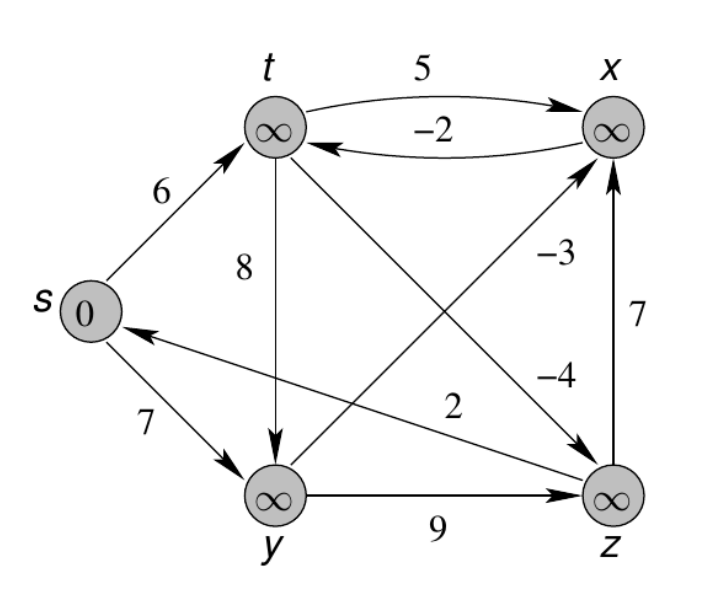

In [4]:
from IPython.display import Image
Image(filename='./assets/g2.png')

## Build Graph
With vertices and their adjacence lists

In [5]:
my_graph.build_graph()
my_graph.print_adj_list()

s -> {1: 6, 4: 7}
t -> {2: 5, 3: -4, 4: 8}
x -> {1: -2}
z -> {0: 2, 2: 7}
y -> {2: -3, 4: 9}


## Relax function

In [6]:
def relax(current, adjacent):
    if adjacent.d > current.d + current.adjacents[adjacent.id]:
        adjacent.d = current.d + current.adjacents[adjacent.id]
        adjacent.p = current

## Bellman-Ford

In [7]:
def bellman_ford(graph):
    for current in graph.vertices:
        print('-')
        for adjacent in current.adjacents:
            print(adjacent, end='')
            
    for current in graph.vertices:
        for adjacent in current.adjacents:
            assert adjacent.d <= current.d + current.adjacents[adjacent.id]

    for index, vertice in enumerate(graph.vertices):
        print(vertice.d)

bellman_ford(my_graph)

-
14-
234-
1-
02-
24

AttributeError: 'int' object has no attribute 'd'